In [1]:

import numpy as np
import matplotlib.pyplot as plt
# market data from Yahoo! Finance's API
import yfinance as yf


In [2]:
# in this function we calculate the data
def bollinger_bands(data, window_size = 20):
    """
    Function to calculate Bollinger Bands for a given dataset.

    Parameters:
    - data: DataFrame containing stock data that contains 'Close' column.
    - window_size: Size of the window for calculating the moving average and STD.

    Returns:
    - DataFrame with 'upperBand' and 'lowerBand' columns added, representing the upper and lower Bollinger Bands.
    """
    simple_moving_avarage = data['Close'].rolling(window = window_size, min_periods = 1 ).mean()
    rolling_std = data['Close'].rolling(window = window_size, min_periods = 1).std()
    
    # add the two columns 
    print("the rolling std: \n")
    print(rolling_std)
    print("SMA is : \n")
    print(simple_moving_avarage)
    data['upperBand'] = simple_moving_avarage + 2 * rolling_std
    data['lowerBand'] = simple_moving_avarage - 2 * rolling_std
    
    return data,simple_moving_avarage
    

In [3]:
# create
def calculate_RSI(data, window = 10):
    """
    Function to calculate the Relative Strength Index (RSI) for agiven dataset.
    
    Parameters:
    - data: DataFrame containing stock data that contains 'Close' column.
    - window: Size of the window for calculating average gain and average loss.
    
    Returns:
    - DataFrame with 'RSI', 'overBought', and 'overSold' columns added, representing the RSI values
      and overbought/oversold thresholds respectively.
    """
    # calculate the change of price 
    delta = data['Close'].diff()
    
    # seperate the gain and loss in the data
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    
    # calculate RS
    avg_gain = gain.rolling(window = window, min_periods = 1).mean()
    avg_loss = loss.rolling(window = window, min_periods = 1).mean()
    RS = avg_gain / avg_loss
    
    # calculate the RSI
    RSI = 100 - (100/1+RS)
    data['RSI'] = RSI
    data['overBought'] = 70
    data['overSold'] = 30
    return data
    
    

In [4]:
def strategy(data):
    """
    Trading strategy based on Bollinger Bands and RSI.

    Parameters:
    - data: DataFrame containing stock data with 'Close', 'lowerBand', 'RSI', 'overSold', 'upperBand', 'overBought'.

    Returns:
    - buy_price: List of buy prices. NaN is appended if no buy signal is generated.
    - sell_price: List of sell prices. NaN is appended if no sell signal is generated.
    """
    position = 0 
    buy_price = []  
    sell_price = []  

    for i in range(len(data)):
        
        # Buy signal conditions: Close price below lower Bollinger Band and RSI below oversold threshold
        if data['Close'][i] < data['lowerBand'][i] and data['RSI'][i] < data['overSold'][i] and position == 0:
            position = 1 
            buy_price.append(data['Close'][i])  
            sell_price.append(np.nan) 
            
        # Sell signal conditions: Close price above upper Bollinger Band and RSI above overbought threshold
        elif data['Close'][i] > data['upperBand'][i] and data['RSI'][i] > data['overBought'][i] and position == 1:
            position = 0 
            sell_price.append(data['Close'][i])  
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)

    return buy_price, sell_price


In [5]:
stocks_symbols = ['AAPL', 'TATASTEEL.NS']

In [6]:
def fetch_stock_data(stock_symbol):
    """
    Function to fetch stock data from Yahoo Finance API.

    Returns:
    - data: DataFrame containing historical stock data for AAPL with a 1-hour timeframe.
    """
    # Fetch AAPL stock data with a 1-hour timeframe by using Yahoo Finance API
    stock = yf.Ticker(stock_symbol)

    
    # Adjust the period and interval as we needed
    data = stock.history(period="12mo",
                        )
    
    return data


In [7]:
data = fetch_stock_data(stocks_symbols[1])

In [8]:
data.shape

(247, 7)

In [9]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-10 00:00:00+05:30,106.135910,106.523269,105.167517,105.796974,19213215,0.0,0.0
2023-05-11 00:00:00+05:30,105.748545,106.039066,104.828574,105.119095,19817637,0.0,0.0
2023-05-12 00:00:00+05:30,104.925412,104.973835,103.182308,103.375984,36794838,0.0,0.0
2023-05-15 00:00:00+05:30,103.666510,104.780156,102.310758,104.295959,22148028,0.0,0.0
2023-05-16 00:00:00+05:30,104.780158,105.215939,103.811764,104.005447,18587658,0.0,0.0


In [10]:
data.shape

(247, 7)

In [11]:
data,SMA_close = bollinger_bands(data)

the rolling std: 

Date
2023-05-10 00:00:00+05:30         NaN
2023-05-11 00:00:00+05:30    0.479333
2023-05-12 00:00:00+05:30    1.248943
2023-05-15 00:00:00+05:30    1.046267
2023-05-16 00:00:00+05:30    0.950434
                               ...   
2024-05-06 00:00:00+05:30    2.574136
2024-05-07 00:00:00+05:30    2.565976
2024-05-08 00:00:00+05:30    2.583500
2024-05-09 00:00:00+05:30    2.637887
2024-05-10 00:00:00+05:30    2.642839
Name: Close, Length: 247, dtype: float64
SMA is : 

Date
2023-05-10 00:00:00+05:30    105.796974
2023-05-11 00:00:00+05:30    105.458035
2023-05-12 00:00:00+05:30    104.764018
2023-05-15 00:00:00+05:30    104.647003
2023-05-16 00:00:00+05:30    104.518692
                                ...    
2024-05-06 00:00:00+05:30    164.272501
2024-05-07 00:00:00+05:30    164.315002
2024-05-08 00:00:00+05:30    164.450002
2024-05-09 00:00:00+05:30    164.285001
2024-05-10 00:00:00+05:30    164.097501
Name: Close, Length: 247, dtype: float64


In [12]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand
Date,,,,,,,,,
2023-05-10 00:00:00+05:30,106.135910,106.523269,105.167517,105.796974,19213215,0.0,0.0,NaN,NaN
2023-05-11 00:00:00+05:30,105.748545,106.039066,104.828574,105.119095,19817637,0.0,0.0,106.416701,104.499368
2023-05-12 00:00:00+05:30,104.925412,104.973835,103.182308,103.375984,36794838,0.0,0.0,107.261903,102.266132
2023-05-15 00:00:00+05:30,103.666510,104.780156,102.310758,104.295959,22148028,0.0,0.0,106.739537,102.554469
2023-05-16 00:00:00+05:30,104.780158,105.215939,103.811764,104.005447,18587658,0.0,0.0,106.419560,102.617824


In [13]:
data = calculate_RSI(data)


In [14]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand,RSI,overBought,overSold
Date,,,,,,,,,,,,
2023-05-10 00:00:00+05:30,106.135910,106.523269,105.167517,105.796974,19213215,0.0,0.0,NaN,NaN,NaN,70,30
2023-05-11 00:00:00+05:30,105.748545,106.039066,104.828574,105.119095,19817637,0.0,0.0,106.416701,104.499368,0.000000,70,30
2023-05-12 00:00:00+05:30,104.925412,104.973835,103.182308,103.375984,36794838,0.0,0.0,107.261903,102.266132,0.000000,70,30
2023-05-15 00:00:00+05:30,103.666510,104.780156,102.310758,104.295959,22148028,0.0,0.0,106.739537,102.554469,0.380000,70,30
2023-05-16 00:00:00+05:30,104.780158,105.215939,103.811764,104.005447,18587658,0.0,0.0,106.419560,102.617824,0.339286,70,30


In [15]:
buy_price, sell_price = strategy(data)

In [16]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand,RSI,overBought,overSold
Date,,,,,,,,,,,,
2023-05-10 00:00:00+05:30,106.135910,106.523269,105.167517,105.796974,19213215,0.0,0.0,NaN,NaN,NaN,70,30
2023-05-11 00:00:00+05:30,105.748545,106.039066,104.828574,105.119095,19817637,0.0,0.0,106.416701,104.499368,0.000000,70,30
2023-05-12 00:00:00+05:30,104.925412,104.973835,103.182308,103.375984,36794838,0.0,0.0,107.261903,102.266132,0.000000,70,30
2023-05-15 00:00:00+05:30,103.666510,104.780156,102.310758,104.295959,22148028,0.0,0.0,106.739537,102.554469,0.380000,70,30
2023-05-16 00:00:00+05:30,104.780158,105.215939,103.811764,104.005447,18587658,0.0,0.0,106.419560,102.617824,0.339286,70,30


In [17]:
data['buy'] = buy_price
data['sell'] = sell_price


In [18]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand,RSI,overBought,overSold,buy,sell
Date,,,,,,,,,,,,,,
2023-05-10 00:00:00+05:30,106.135910,106.523269,105.167517,105.796974,19213215,0.0,0.0,NaN,NaN,NaN,70,30,NaN,NaN
2023-05-11 00:00:00+05:30,105.748545,106.039066,104.828574,105.119095,19817637,0.0,0.0,106.416701,104.499368,0.000000,70,30,NaN,NaN
2023-05-12 00:00:00+05:30,104.925412,104.973835,103.182308,103.375984,36794838,0.0,0.0,107.261903,102.266132,0.000000,70,30,NaN,NaN
2023-05-15 00:00:00+05:30,103.666510,104.780156,102.310758,104.295959,22148028,0.0,0.0,106.739537,102.554469,0.380000,70,30,NaN,NaN
2023-05-16 00:00:00+05:30,104.780158,105.215939,103.811764,104.005447,18587658,0.0,0.0,106.419560,102.617824,0.339286,70,30,NaN,NaN


In [21]:
my_nan = data['buy'][1]
type(my_nan)
print(my_nan)
data[data['buy'].notnull()]


nan


,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand,RSI,overBought,overSold,buy,sell
Date,,,,,,,,,,,,,,
2023-10-04 00:00:00+05:30,127.0,127.099998,124.5,125.300003,33272725,0.0,0.0,132.665698,125.4393,0.452127,70,30,125.300003,NaN


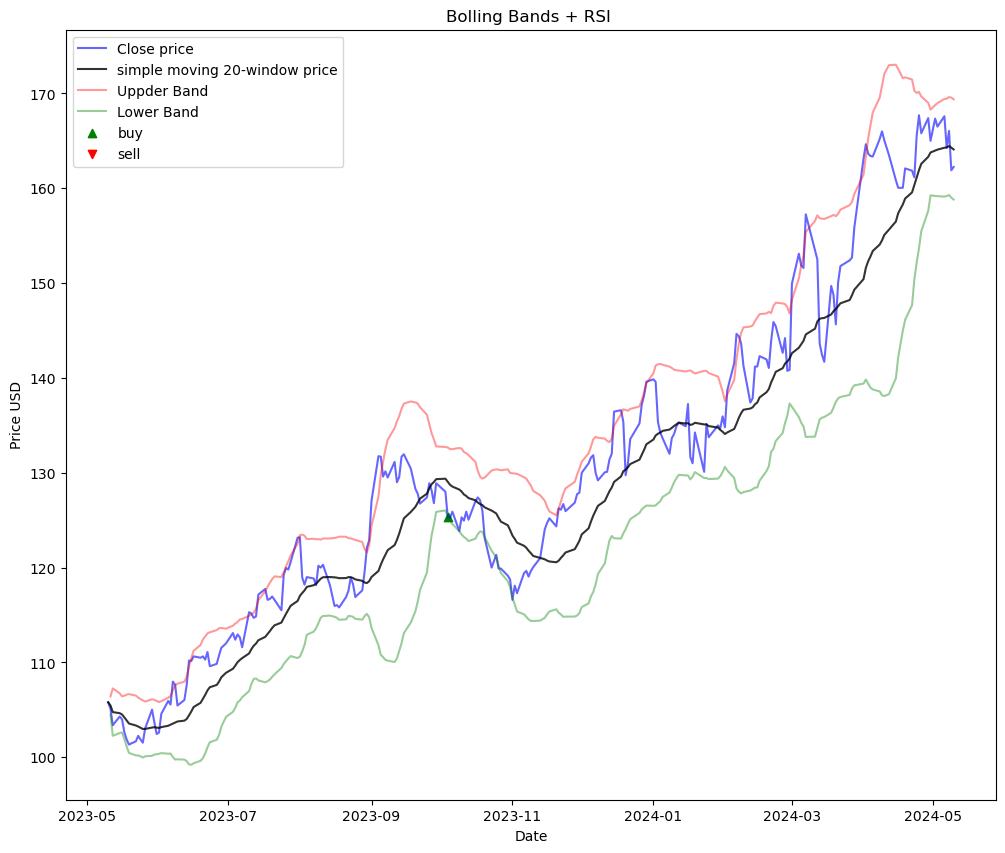

In [ ]:
# plotting
fix, ax = plt.subplots(figsize=(12,10))
plt.title("Bolling Bands + RSI ")
plt.ylabel("Price USD")
plt.xlabel("Date")

ax.plot(data['Close'], label='Close price', alpha=.6, color='blue')
ax.plot(SMA_close, label='simple moving 20-window price', alpha=.8, color='black')
ax.plot(data['upperBand'], label='Uppder Band', alpha=.4, color='red')
ax.plot(data['lowerBand'], label='Lower Band', alpha=.4, color='green')

# ax.fill_between(data.index, data['upperBand'], data['lowerBand'], color='grey')
ax.scatter(data.index, data['buy'], label="buy", alpha=1, marker='^', color='green')
ax.scatter(data.index, data['sell'], label="sell", alpha=1, marker="v", color='red')

plt.legend()
plt.savefig('bollinger_bands.png')
# plt.show()